In [42]:
#Importing basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from dtreeviz.trees import *

ModuleNotFoundError: No module named 'dtreeviz'

In [2]:
#Importing the Dataset
#Boston Housing Dataset
boston = pd.read_csv('C:\\Users\\D648007\\HousingData.csv')
dataset = boston

In [3]:
#Look at dataset's dimensions: rows and columns
print(dataset.shape)

(506, 14)


In [4]:
#View first 15 rows to see what the data is like
#CRIM - per capita crime rate
#ZN - % zoned for large lots
#INDUS - % not retail business acres
#CHAS - 1 if borders river, 0 if not
#NOX - chemical concentration
#RM - av no of rooms
#AGE - % of houses built before 1940
#DIS -distance to work centres
#RAD - accessability to radial highway
#TAX - tax rate
#PTRATIO - pubil teacher ratio
#B - % of blacks
#LSTAT - % lower status
#MEDV = outcome variable median value
dataset.head(15)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [5]:
#Change column names to shorten them so are easier to read in tables
#dataset.columns = ['Preg', 'Gluc', 'BP', 'SkTh', 'Ins', 'BMI', 'DPF', 'Age', 'Outcome']

In [6]:
#Get basic descriptive stats of the dataset to understand mean, median, standard dev, range
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
##Not relevant for regression
#To understand class distribution - i.e. how many in the sample get diabetes vs dont
#This is a 'classification' prediction exercise, we want to classify people into two groups - will/won't get diabetes 
#class_counts = dataset.groupby('Outcome').size()
#print(class_counts)

In [9]:
#To inspect the correlation between different features, i.e. how they may or may not change with each other. 
#Values range from -1 to 1 and a value of 0 means no correlation at all.
#Pearson's correlation assumes a normal distribution of the features.
#Some ML algorithms don't work well if the data is highly correlated.
from pandas import set_option
set_option('display.width', 150)
set_option('precision', 2)
corr = dataset.corr(method='pearson')
print(corr)

         CRIM    ZN  INDUS      CHAS   NOX    RM   AGE   DIS       RAD   TAX  PTRATIO     B  LSTAT  MEDV
CRIM     1.00 -0.19   0.40 -5.44e-02  0.42 -0.22  0.35 -0.37  6.25e-01  0.58     0.28 -0.38   0.44 -0.39
ZN      -0.19  1.00  -0.53 -3.72e-02 -0.51  0.32 -0.56  0.66 -3.11e-01 -0.31    -0.41  0.17  -0.41  0.37
INDUS    0.40 -0.53   1.00  5.99e-02  0.76 -0.39  0.64 -0.71  6.05e-01  0.73     0.39 -0.36   0.59 -0.48
CHAS    -0.05 -0.04   0.06  1.00e+00  0.08  0.10  0.08 -0.09  1.47e-03 -0.03    -0.11  0.05  -0.05  0.18
NOX      0.42 -0.51   0.76  7.51e-02  1.00 -0.30  0.73 -0.77  6.11e-01  0.67     0.19 -0.38   0.58 -0.43
RM      -0.22  0.32  -0.39  1.05e-01 -0.30  1.00 -0.25  0.21 -2.10e-01 -0.29    -0.36  0.13  -0.61  0.70
AGE      0.35 -0.56   0.64  7.88e-02  0.73 -0.25  1.00 -0.74  4.58e-01  0.51     0.27 -0.28   0.60 -0.39
DIS     -0.37  0.66  -0.71 -9.40e-02 -0.77  0.21 -0.74  1.00 -4.95e-01 -0.53    -0.23  0.29  -0.49  0.25
RAD      0.62 -0.31   0.60  1.47e-03  0.61 -0.21  0.46 

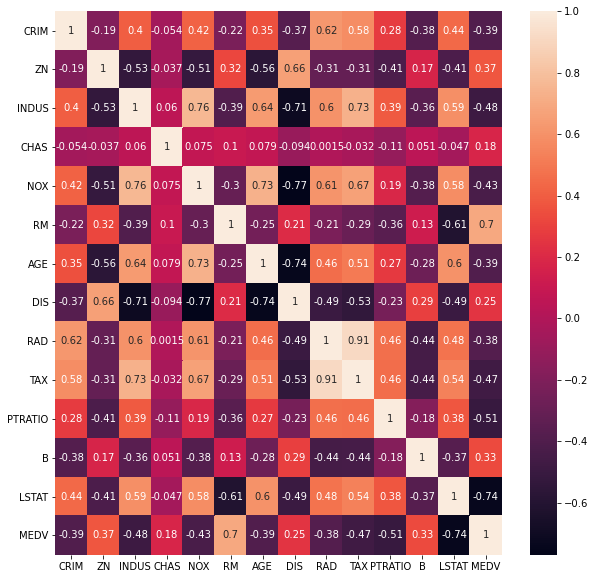

In [20]:
#View correlations as a heatmap matrix, lighter colours = more correlation
plt.figure(figsize = (10,10))
sns.heatmap(corr, annot=True)

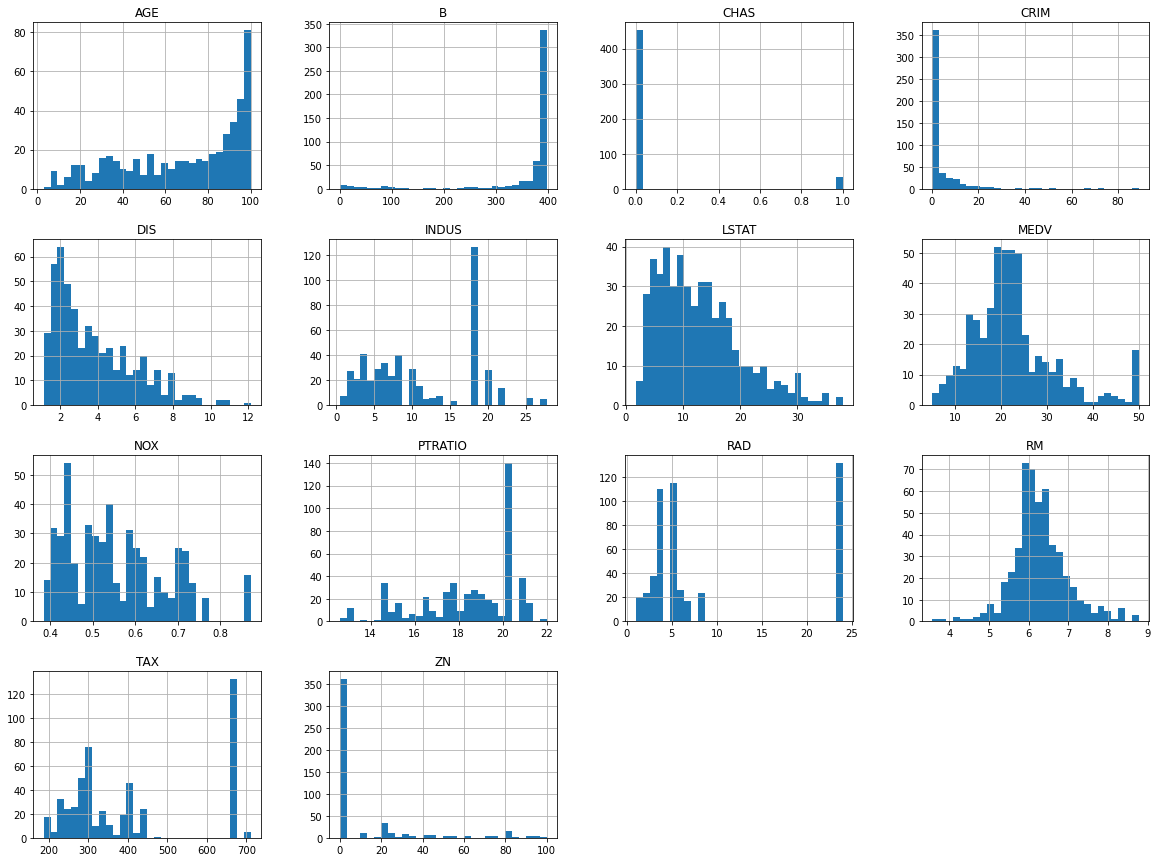

In [21]:
#Univariate histograms show us the distribution of each feature
dataset.hist(bins=30, figsize=(20,15))
plt.show()

In [22]:
#Identify which columns have NaN (Not a Number - i.e. missing values)
nan_values = dataset.isna()
nan_columns = nan_values.any()

columns_with_nan = dataset.columns[nan_columns].tolist()
print(columns_with_nan)

#All the columns with count = 486 have NaN
#Need to remove the NaN

['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']


In [170]:
#Some feaures contain 0 where it doesnt make sense for the value to be 0, probably missing data.
#Replace 0 with NaN (Not a Number) in BMI, BloodPressure, Glucose, Insulin and SkinThinckness (not pregnancies as 0 pregnancies makes sense)
#dataset[['BMI', 'BP', 'Gluc', 'Ins', 'SkTh']] = dataset[['BMI', 'BP', 'Gluc', 'Ins', 'SkTh']].replace(0,np.NaN)

In [171]:
#To see what the dataset looks like now, with NaN
#dataset.head(10)

,Preg,Gluc,BP,SkTh,Ins,BMI,DPF,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


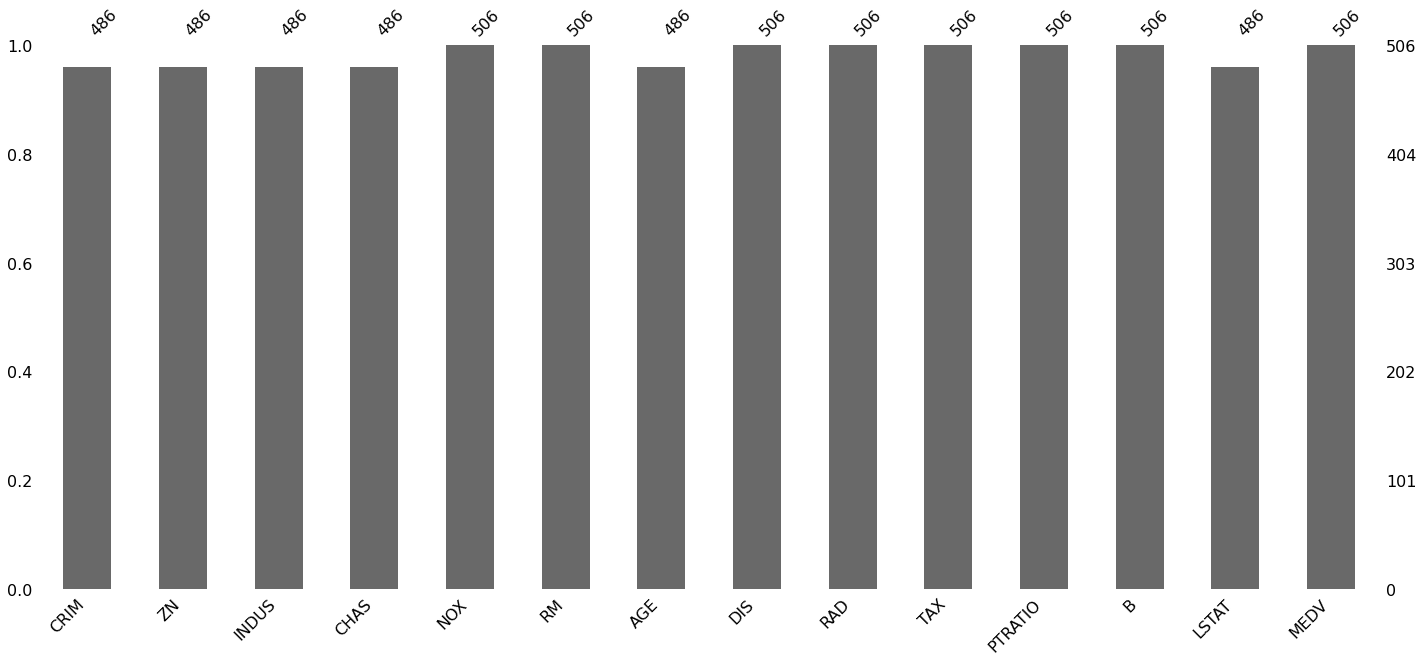

In [23]:
#Chart the features to see what % of each feature is missing, using the NaN
import missingno as msno
msno.bar(dataset)

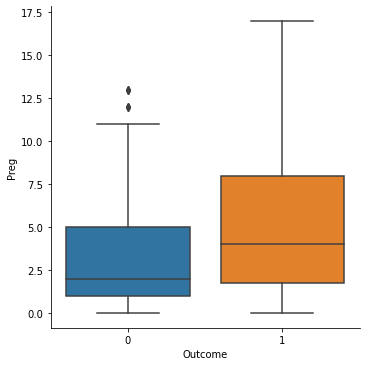

In [173]:
##Not relevant for regression model,useful for classification
#Plot distribution of Pregnancies against diabetes
#sns.catplot(x = "Outcome", y = "Preg", kind = "box", data = dataset)

In [24]:
#Replace the NaNs with the median for that feature
dataset = dataset.fillna(dataset.median())
#Alternative approach would be to remove the rows with the data gaps (with the NaN)

In [25]:
dataset.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,6.32e-03,18.0,2.31,0.0,0.54,6.58,65.2,4.09,1,296,15.3,396.90,4.98,24.0
1,2.73e-02,0.0,7.07,0.0,0.47,6.42,78.9,4.97,2,242,17.8,396.90,9.14,21.6
2,2.73e-02,0.0,7.07,0.0,0.47,7.18,61.1,4.97,2,242,17.8,392.83,4.03,34.7
3,3.24e-02,0.0,2.18,0.0,0.46,7.00,45.8,6.06,3,222,18.7,394.63,2.94,33.4
4,6.91e-02,0.0,2.18,0.0,0.46,7.15,54.2,6.06,3,222,18.7,396.90,11.43,36.2
5,2.99e-02,0.0,2.18,0.0,0.46,6.43,58.7,6.06,3,222,18.7,394.12,5.21,28.7
6,8.83e-02,12.5,7.87,0.0,0.52,6.01,66.6,5.56,5,311,15.2,395.60,12.43,22.9
7,1.45e-01,12.5,7.87,0.0,0.52,6.17,96.1,5.95,5,311,15.2,396.90,19.15,27.1
8,2.11e-01,12.5,7.87,0.0,0.52,5.63,100.0,6.08,5,311,15.2,386.63,29.93,16.5
9,1.70e-01,12.5,7.87,0.0,0.52,6.00,85.9,6.59,5,311,15.2,386.71,17.10,18.9


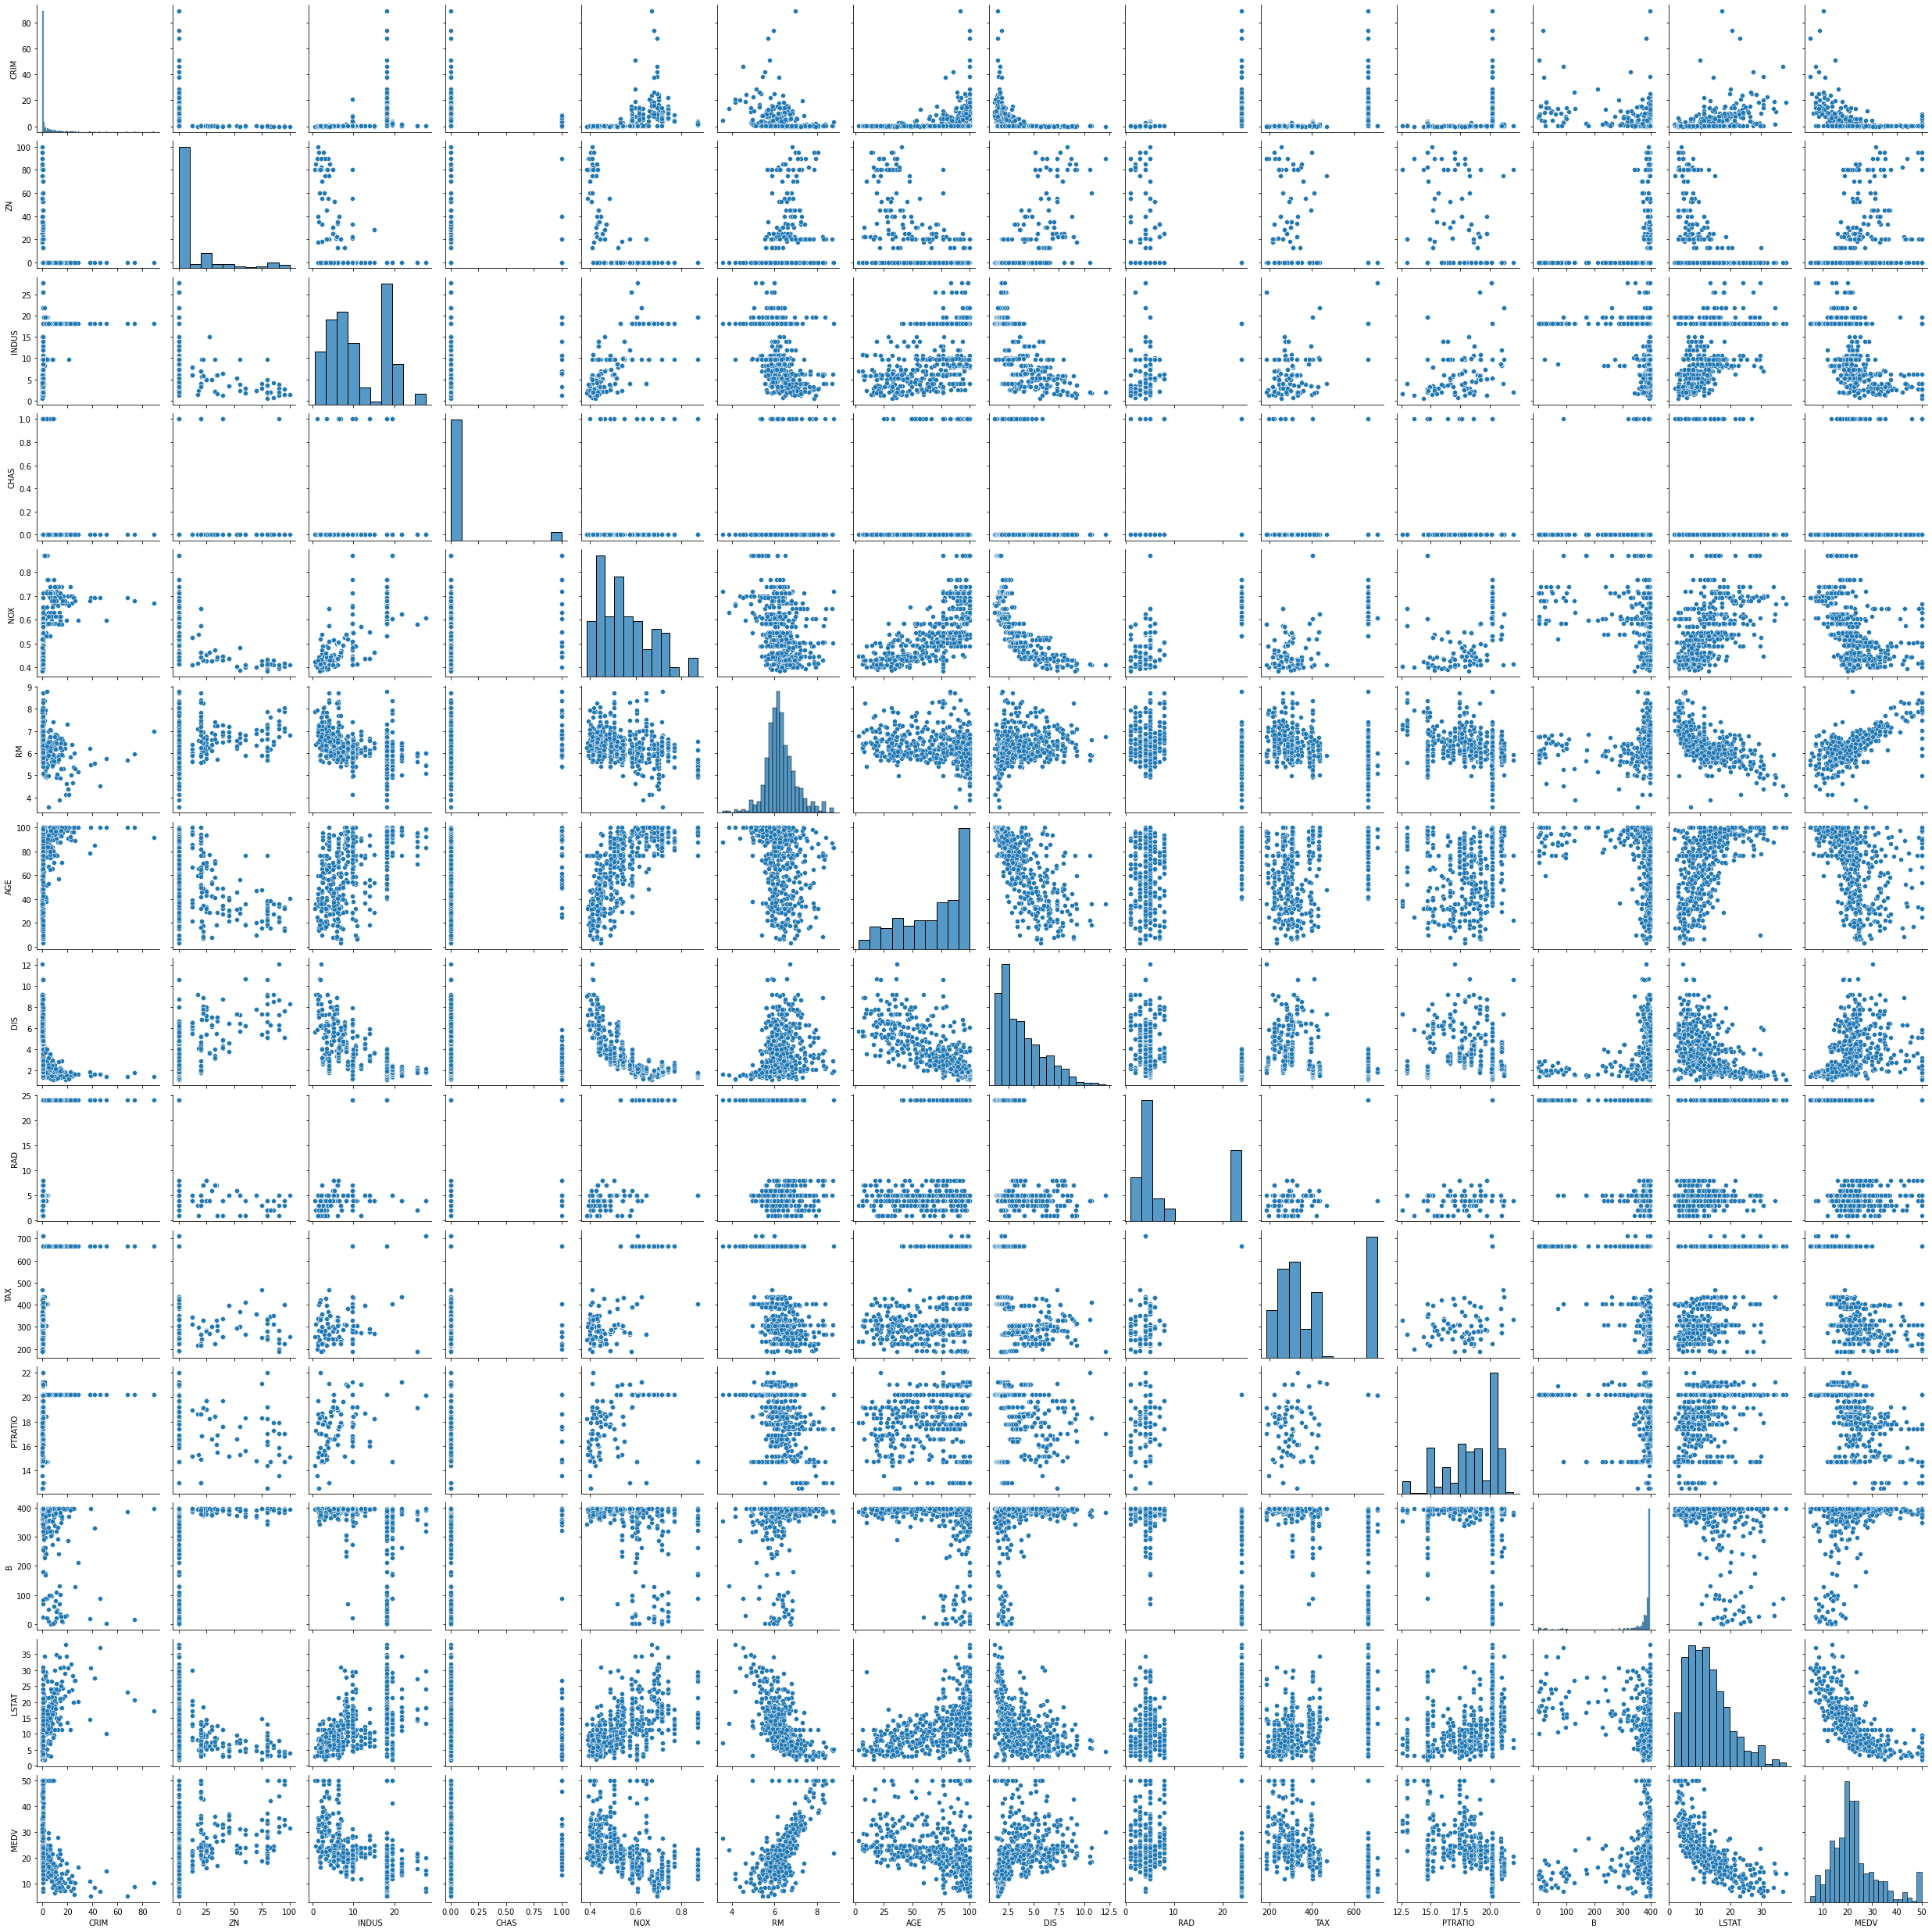

In [27]:
#Scatterplot for the data with the medians attached
sns.pairplot(dataset)
#If classification, can use sns.pairplot(dataset, hue = '(insert name of Y variable)') to colour dots based on class)

In [28]:
#Separate the dataset into dependent (x) and independent (y, has diabetes) components, starting with converting to array
array = dataset.values

X = array[:, 0:13]
Y = array[:, 13]


In [13]:
#Split into training and test data
# We train the model on the training data and then test how good it is using the unseen test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=5)

In [29]:
print(X.shape)

(506, 13)


In [16]:
print(Y_train.shape)

(379,)


In [38]:
#Fit model #1 Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth = 3)
dt.fit(X, Y)

DecisionTreeRegressor(max_depth=3)

In [188]:
#Test decision Tree model accuracy using test dataset
resultdt = dt.score(X_test, Y_test)
print("Test Set Accuracy of Decision Tree model: %.3f%%" % (resultdt*100.0))

Test Set Accuracy of Decision Tree model: 76.042%


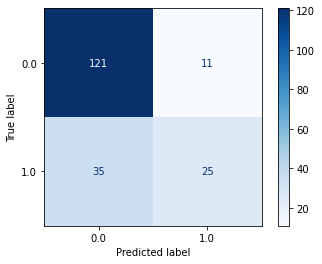

In [189]:
#Plot confusion matrix to see what proportion of diabetes cases are predicted correctly
from sklearn.metrics import plot_confusion_matrix
matrixdt = plot_confusion_matrix(dt, X_test, Y_test, cmap=plt.cm.Blues)
plt.show(matrixdt)

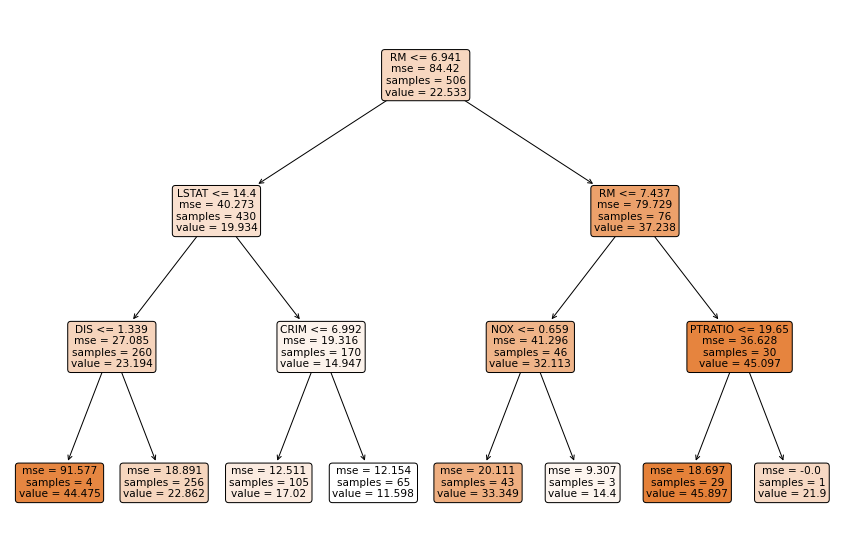

In [41]:
#Plot Decision Tree model as a tree using sklearn.tree, plot_tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(15,10))
fn = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS' ,'RAD' , 'TAX' , 'PTRATIO', 'B' , 'LSTAT']
plot_tree(dt, filled=True, ax=ax, feature_names = fn, rounded=True)
plt.show()

In [ ]:
#Plot Decision Tree model using dtreez